# MNIST Classification Reference Test

In [1]:
import requests
import math
import numpy
from helpers.basis_helper import parse_basis, normalize
from helpers.tf_qsoftmax import qsoftmax

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### We're going to build two models.
In theory the two should be identical, but we will use a lambda layer and our `qsoftmax` function with the identity matrix to verify that the qsoftmax as a lambda layer works the same way and that this structure works so when we test on QO or SC encodings we have confidence this works. First the reference model from the [Tensorflow 2 Quickstart](https://www.tensorflow.org/tutorials/quickstart/beginner)

In [3]:
normal_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

#### Next the variation using `qsoftmax` and a lambda layer

In [4]:
lambda_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Lambda(qsoftmax(numpy.identity(10,dtype=numpy.float32)))
])

#### Next we compile and fit both models

In [5]:
normal_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
lambda_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
normal_model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test), verbose=0)

In [7]:
lambda_model.fit(x_train, y_train, epochs=20,validation_data=(x_test, y_test), verbose=0)

## We display some results
### The validation loss tells us how well the training went

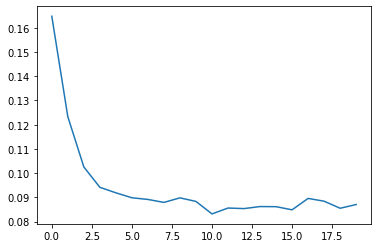

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Markdown

plt.plot(normal_model.history.history['val_loss'])

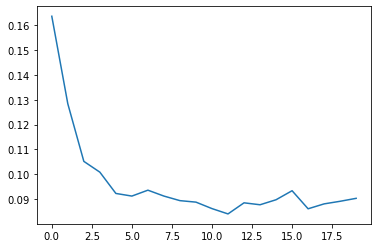

In [9]:
plt.plot(lambda_model.history.history['val_loss'])

### Print the final results in big bold text

In [10]:
text = "For the normal model, the accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    normal_model.history.history['val_accuracy'][-1]*100.,
    normal_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# For the normal model, the accuracy is 97.720% for the test set and 98.053% for the training set

In [11]:
text

'For the normal model, the accuracy is 97.720% for the test set and 98.053% for the training set'

In [12]:
text = "For the lambda model, the accuracy is {:4.3f}% for the test set and {:4.3f}% for the training set".format(
    lambda_model.history.history['val_accuracy'][-1]*100,
    lambda_model.history.history['accuracy'][-1]*100)
display(Markdown(f"# {text}"))

# For the lambda model, the accuracy is 97.580% for the test set and 98.055% for the training set

In [13]:
text

'For the lambda model, the accuracy is 97.580% for the test set and 98.055% for the training set'